### Intracellular Ca signalling model

1. Markov state model was built based on "Allosteric Regulation of the P2X4 Recepter Channel Pore Dilation" by Zemkova, Khadra, Rokic, Tvrdonova, Sherman, and Stojikovic.

- This is the 13-state model

2. The relative contribution of Ca to total inward current in the cell (HEK293) was reported to be 8.24 +- 0.36% by Garcia-Guzman. -> This may need to be adjusted for rat P2X4 channel
3. The diameter of HEK293 cell body is approximated to be 13 microns -> r = 6.5 microns
4. The diameter of microglia cell body is approximated to be 5.2 microns -> r = 2.6 microns (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4213482/)
5. Beyond the buffering effects of calmodulin was handled by Rachel
6. The intermediate product of this code is "intracellular Ca transient"
7. The final outcome of this code is "TNF-alpha transient"

*1. Markov state model was built based on "Dual gating mechanism and function of P2X7 receptor channels" by Khadra and modified to adjust the current profile from the activation by BzATP to ATP. 

- This is the 12-state model
- BzATP = 4.11863563exp(ATP*0.00479906) 

#### Limitations & Assumptions

1. NFAT terms with no detail connection to buffering effects.

2. No TNF terms

#### NFATNn Profile & TNF-alpha release

1. Even after adjusting some of parameters, there is no supporting data to explain or indicating the scale of concentrations. 
2. The pattern of profile will be used as a switch of TNF-alpha release and the concentration of NFATNn will not influence on the degree of release
3. The release of TNF-alpha will be fully assumed based on general RNA transcription and translation. https://www.mathworks.com/help/simbio/gs/-model-a-gene-regulation-pathway.html?requestedDomain=true

In [3]:
# Function for integreating ODE and displaying results
import scipy.integrate
from scipy.integrate import odeint
import numpy as np
import matplotlib.pylab as plt
import math
from math import exp
from scipy.interpolate import spline
import pickle as pk
%matplotlib inline

# Importing the microglia related packages
import data_v3 as dt      # Data sorting code
import TNFa as ta      # TNFa release code
import NFAT as nt      # NFAT cycle code
import MSMp2x4 as p4   # Markov State Model for P2X4 channel
import MSMp2x7 as p7   # Markov State Model for P2X7 channel
import SBbuffers as bf # Buffers (Fura-2, Calmodulin, and Calsequestrin) code
import SERCAER as er   # SERCA Pump code
import NCX as nx       # Na/Ca exchanger code
import calculator_v5 as ca

import numpy.random as npr
# normal random distribution
from numpy.random import normal as nprn
# uniform random distribution
from numpy.random import uniform as npru

In [4]:
results1 = ca.total(480,20,10,1000,1000)

/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:56: RuntimeWarning: overflow encountered in double_scalars
  Rexo = (kmaxexo/(1+(IC50NFAT2/(NFATNn))**nNFAT2))*TNFa + (kmaxleak/(1+(IC50Caleak/(Cai*10**6))**nCaleak))*TNFa
/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:63: RuntimeWarning: overflow encountered in double_scalars
  dTNFa_releasedt= (kmaxexo/(1+(IC50NFAT2/NFATNn)**nNFAT2))*TNFa


In [5]:
results2 = ca.total(480,20,10,1000,100)

/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:56: RuntimeWarning: overflow encountered in double_scalars
  Rexo = (kmaxexo/(1+(IC50NFAT2/(NFATNn))**nNFAT2))*TNFa + (kmaxleak/(1+(IC50Caleak/(Cai*10**6))**nCaleak))*TNFa
/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:63: RuntimeWarning: overflow encountered in double_scalars
  dTNFa_releasedt= (kmaxexo/(1+(IC50NFAT2/NFATNn)**nNFAT2))*TNFa


In [6]:
results3 = ca.total(480,20,10,1000,10)

/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:56: RuntimeWarning: overflow encountered in double_scalars
  Rexo = (kmaxexo/(1+(IC50NFAT2/(NFATNn))**nNFAT2))*TNFa + (kmaxleak/(1+(IC50Caleak/(Cai*10**6))**nCaleak))*TNFa
/home/AD/bch265/Dropbox/Postdoctoral2017-/Modeling-Codes/repo/bens-code/Microglia2018/TNFa.py:63: RuntimeWarning: overflow encountered in double_scalars
  dTNFa_releasedt= (kmaxexo/(1+(IC50NFAT2/NFATNn)**nNFAT2))*TNFa


In [26]:
Cai1 = results1[0]
Cai2 = results2[0]
Cai3 = results3[0]
CaER1 = results1[3]
CaER2 = results2[3]
CaER3 = results3[3]

t1 = results1[-1]
t2 = results2[-1]
t3 = results3[-1]

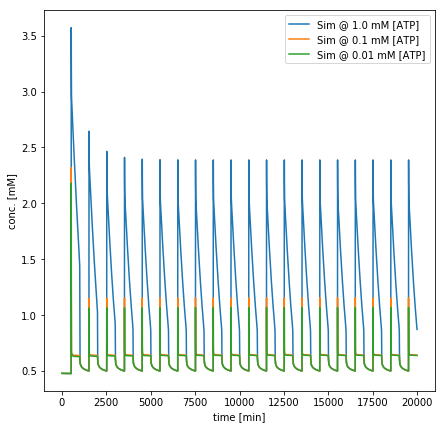

In [6]:
plt.figure(figsize=(7,7))
plt.subplot()
plt.plot(t1,CaER1*10**3,label="Sim @ 1.0 mM [ATP]")
plt.plot(t2,CaER2*10**3,label="Sim @ 0.1 mM [ATP]")
plt.plot(t3,CaER3*10**3,label="Sim @ 0.01 mM [ATP]")
plt.xlabel("time [min]")
plt.ylabel("conc. [mM]")
plt.legend(loc=0)
#plt.xlim(0,1750/60)


In [59]:
from numpy import ma
iters1 = np.arange(20)
interval = 1000
st = 480
ATP = []
timeATP = []
dummy = np.nan
for i in iters1:
    ti = i*interval
    tf = (1+i)*interval-st
    trs = scipy.linspace(ti,tf,(2))
    iters2 = np.arange(np.shape(trs)[0])
    for j in iters2:
        ATP = np.append(ATP,dummy)
    tst=scipy.linspace(tf,(tf+st),(2))
    iters3 = np.arange(np.shape(tst)[0])
    for k in iters3:
        ATP = np.append(ATP,1)
    timeATP = np.append(timeATP,trs)
    timeATP = np.append(timeATP,tst)

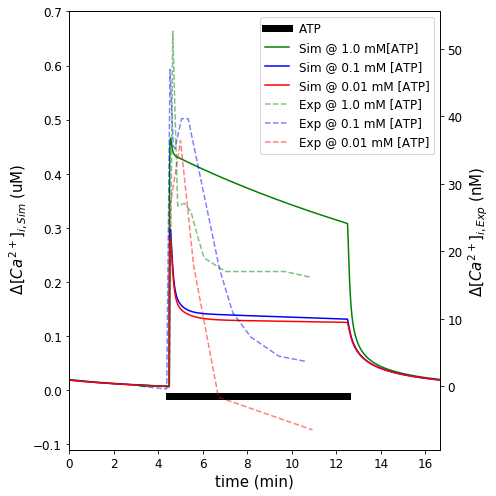

In [32]:
ly1 = np.array([0,0,27.10982659,36.41618497,17.80346821,-1.61849711,-6.473988439])
ly2 = np.array([0,-0.4046242775,46.93641618,35.60693642,35.20231214,39.65317919,39.65317919,17.39884393,10.92485549,7.283236994,4.450867052,3.641618497])
ly3 = np.array([0,0,52.60115607,26.70520231,27.10982659,25.89595376,21.44508671,19.01734104,16.99421965,16.99421965,16.1849711])

lt1 = np.array([0,1.185185185,1.259259259,1.703703704,2.296296296,3.407407407,7.62962963])
lt2 = np.array([0,1.185185185,1.333333333,1.481481481,1.555555556,1.851851852,2.148148148,3.555555556,4.148148148,4.962962963,6.222222222,7.481481481])
lt3 = np.array([0,1.407407407,1.555555556,1.777777778,2.074074074,2.37037037,2.740740741,2.962962963,3.925925926,6.592592593,7.703703704])

min1 = min(Cai1)
min2 = min(Cai2)
min3 = min(Cai3)


plt.figure(figsize = (7,7))
ax = plt.subplot()
ax2 = ax.twinx()
ax.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)
lns1 = ax.plot((t1-18250)/60,(Cai1-min1)*10**6,'g-',label="Sim @ 1.0 mM[ATP]")
lns2 = ax.plot((t2-18250)/60,(Cai2-min2)*10**6,'b-',label="Sim @ 0.1 mM [ATP]")
lns3 = ax.plot((t3-18250)/60,(Cai3-min3)*10**6,'r-',label="Sim @ 0.01 mM [ATP]")
lns4 = ax2.plot(lt1+3.3,ly1,'r--',alpha=0.5,label="Exp @ 0.01 mM [ATP]") 
lns5 = ax2.plot(lt2+3.2,ly2,'b--',alpha=0.5,label="Exp @ 0.1 mM [ATP]")
lns6 = ax2.plot(lt3+3.1,ly3,'g--',alpha=0.5,label="Exp @ 1.0 mM [ATP]")
lns7 = ax.plot((timeATP-18250)/60,ATP,'k',label='ATP',linewidth=7)
ax.set_xlabel("time (min)",fontsize=15)
ax.set_ylabel(" $\Delta [Ca^{2+}]_{i,Sim}$ (uM)",fontsize=15)
ax2.set_ylabel("$\Delta [Ca^{2+}]_{i,Exp}$ (nM)",fontsize=15)
lns = lns7 + lns1 + lns2 + lns3 + lns6 + lns5 + lns4
labs = [l.get_label() for l in lns]
ax.legend(lns,labs,loc=0,fontsize=12)
ax.set_xlim(0,1000/60)
ax.set_ylim(-0.11,0.70)
plt.tight_layout()
plt.savefig('p2x_Cai_withHide.png')

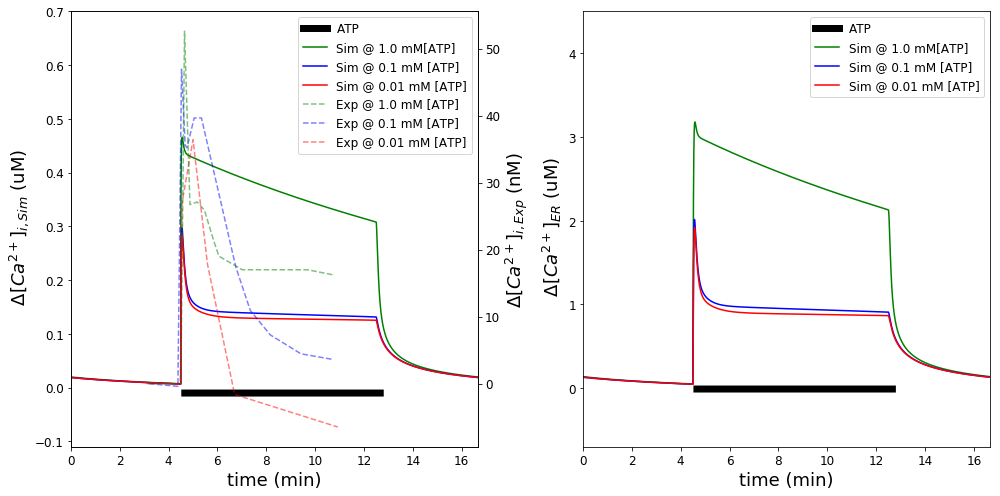

In [46]:
ly1 = np.array([0,0,27.10982659,36.41618497,17.80346821,-1.61849711,-6.473988439])
ly2 = np.array([0,-0.4046242775,46.93641618,35.60693642,35.20231214,39.65317919,39.65317919,17.39884393,10.92485549,7.283236994,4.450867052,3.641618497])
ly3 = np.array([0,0,52.60115607,26.70520231,27.10982659,25.89595376,21.44508671,19.01734104,16.99421965,16.99421965,16.1849711])

lt1 = np.array([0,1.185185185,1.259259259,1.703703704,2.296296296,3.407407407,7.62962963])
lt2 = np.array([0,1.185185185,1.333333333,1.481481481,1.555555556,1.851851852,2.148148148,3.555555556,4.148148148,4.962962963,6.222222222,7.481481481])
lt3 = np.array([0,1.407407407,1.555555556,1.777777778,2.074074074,2.37037037,2.740740741,2.962962963,3.925925926,6.592592593,7.703703704])

min1 = min(Cai1)
min2 = min(Cai2)
min3 = min(Cai3)

plt.figure(figsize = (14,7))
ax = plt.subplot(1,2,1)
ax2 = ax.twinx()
ax.tick_params(labelsize=12)
ax2.tick_params(labelsize=12)
lns1 = ax.plot((t1-18250)/60,(Cai1-min1)*10**6,'g-',label="Sim @ 1.0 mM[ATP]")
lns2 = ax.plot((t2-18250)/60,(Cai2-min2)*10**6,'b-',label="Sim @ 0.1 mM [ATP]")
lns3 = ax.plot((t3-18250)/60,(Cai3-min3)*10**6,'r-',label="Sim @ 0.01 mM [ATP]")
lns4 = ax2.plot(lt1+3.3,ly1,'r--',alpha=0.5,label="Exp @ 0.01 mM [ATP]") 
lns5 = ax2.plot(lt2+3.2,ly2,'b--',alpha=0.5,label="Exp @ 0.1 mM [ATP]")
lns6 = ax2.plot(lt3+3.1,ly3,'g--',alpha=0.5,label="Exp @ 1.0 mM [ATP]")
lns7 = ax.plot((timeATP-18240)/60,ATP,'k',label='ATP',linewidth=7)
ax.set_xlabel("time (min)",fontsize=18)
ax.set_ylabel(" $\Delta [Ca^{2+}]_{i,Sim}$ (uM)",fontsize=18)
ax2.set_ylabel("$\Delta [Ca^{2+}]_{i,Exp}$ (nM)",fontsize=18)
lns = lns7 + lns1 + lns2 + lns3 + lns6 + lns5 + lns4
labs = [l.get_label() for l in lns]
ax.legend(lns,labs,loc=0,fontsize=12)
ax.set_xlim(0,1000/60)
ax.set_ylim(-0.11,0.70)
plt.tight_layout()


min1 = min(CaER1)
min2 = min(CaER2)
min3 = min(CaER3)

ax = plt.subplot(1,2,2)
#ax2 = ax.twinx()
ax.tick_params(labelsize=12)
#ax2.tick_params(labelsize=12)
lns1 = ax.plot((t1-18250)/60,(CaER1-min1)*10**3,'g-',label="Sim @ 1.0 mM[ATP]")
lns2 = ax.plot((t2-18250)/60,(CaER2-min2)*10**3,'b-',label="Sim @ 0.1 mM [ATP]")
lns3 = ax.plot((t3-18250)/60,(CaER3-min3)*10**3,'r-',label="Sim @ 0.01 mM [ATP]")
lns7 = ax.plot((timeATP-18240)/60,ATP,'k',label='ATP',linewidth=7)
ax.set_xlabel("time (min)",fontsize=18)
ax.set_ylabel(" $\Delta [Ca^{2+}]_{ER}$ (uM)",fontsize=18)
#ax2.set_ylabel("$\Delta [Ca^{2+}]_{i,Exp}$ (nM)",fontsize=18)
lns = lns7 + lns1 + lns2 + lns3
labs = [l.get_label() for l in lns]
ax.legend(lns,labs,loc=0,fontsize=12)
ax.set_xlim(0,1000/60)
ax.set_ylim(-0.7,4.5)
plt.tight_layout()
plt.savefig('p2x_Cai_CaER_withHide.png')

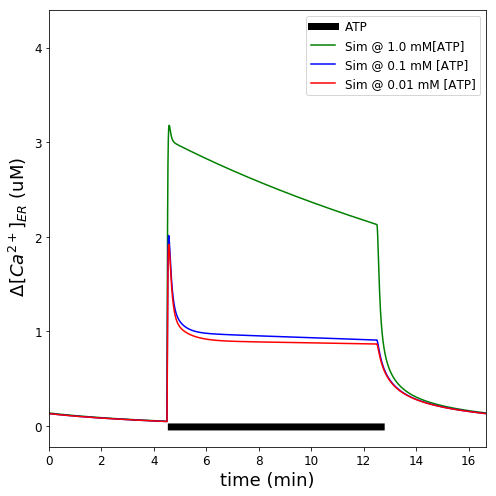

In [47]:
min1 = min(CaER1)
min2 = min(CaER2)
min3 = min(CaER3)

plt.figure(figsize = (7,7))
ax = plt.subplot()
#ax2 = ax.twinx()
ax.tick_params(labelsize=12)
#ax2.tick_params(labelsize=12)
lns1 = ax.plot((t1-18250)/60,(CaER1-min1)*10**3,'g-',label="Sim @ 1.0 mM[ATP]")
lns2 = ax.plot((t2-18250)/60,(CaER2-min2)*10**3,'b-',label="Sim @ 0.1 mM [ATP]")
lns3 = ax.plot((t3-18250)/60,(CaER3-min3)*10**3,'r-',label="Sim @ 0.01 mM [ATP]")
lns7 = ax.plot((timeATP-18240)/60,ATP,'k',label='ATP',linewidth=7)
ax.set_xlabel("time (min)",fontsize=18)
ax.set_ylabel(" $\Delta [Ca^{2+}]_{ER}$ (uM)",fontsize=18)
#ax2.set_ylabel("$\Delta [Ca^{2+}]_{i,Exp}$ (nM)",fontsize=18)
lns = lns7 + lns1 + lns2 + lns3
labs = [l.get_label() for l in lns]
ax.legend(lns,labs,loc=0,fontsize=12)
ax.set_xlim(0,1000/60)
#ax.set_ylim(-0.1,0.70)
plt.tight_layout()
plt.savefig('p2x_CaER.png')

[  34.29555338   36.90106412  100.        ]


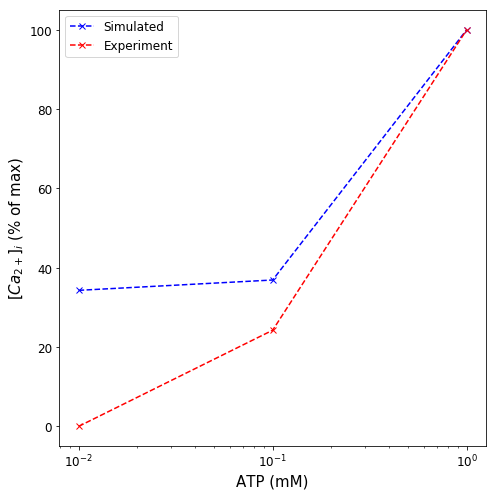

In [46]:
ly1 = np.array([0,0,27.10982659,36.41618497,17.80346821,-1.61849711,-6.473988439])
ly2 = np.array([0,-0.4046242775,46.93641618,35.60693642,35.20231214,39.65317919,39.65317919,17.39884393,10.92485549,7.283236994,4.450867052,3.641618497])
ly3 = np.array([0,0,52.60115607,26.70520231,27.10982659,25.89595376,21.44508671,19.01734104,16.99421965,16.99421965,16.1849711])

min1 = min(Cai1)
min2 = min(Cai2)
min3 = min(Cai3)

max1 = min(Cai1[188500:189700])
max2 = min(Cai2[188500:189700])
max3 = min(Cai3[188500:189700])

dCai1 = max1 - min1
dCai2 = max2 - min2
dCai3 = max3 - min3

litmax1 = max(ly1)
litmax2 = max(ly2)
litmax3 = max(ly3)

mod = np.array([dCai3/dCai1,dCai2/dCai1,dCai1/dCai1])*100
lit = np.array([0,4,16.5])*100/16.5
atp = np.array([0.01,0.1,1])
print(mod)

plt.figure(figsize = (7,7))
plt.tick_params(labelsize=12)
plt.semilogx(atp,mod,'b--x',label="Simulated")
plt.semilogx(atp,lit,'r--x',label="Experiment")
plt.legend(loc=0,fontsize=12)
plt.xlabel("ATP (mM)",fontsize=15)
plt.ylabel("$[Ca_{2+}]_{i}$ (% of max)",fontsize=15)
#ax = plt.subplot()
#ax2 = ax.twinx()
#ax.tick_params(labelsize=12)
#ax2.tick_params(labelsize=12)
#lns1 = ax.semilogx(atp,mod,'b--X',label="Simulated")
#lns2 = ax2.semilogx(atp,lit,'r--X',label="Experiment")

#ax.set_xlabel("ATP (mM)",fontsize=15)
#ax.set_ylabel(" $\Delta [Ca^{2+}]_{i,Sim}$ (uM)",fontsize=15)
#ax2.set_ylabel(" $\Delta [Ca^{2+}]_{i,Exp}$ (nM)",fontsize=15)

#lns = lns1 + lns2
#labs = [l.get_label() for l in lns]
#ax.legend(lns,labs,loc=0,fontsize=12)
plt.tight_layout()
plt.savefig('ATPvsCainfluxLog.png')

In [48]:
[Cai, CaF, CaS, CaER,
        Ca2CaM, Ca4CaM, Ca4CN, CaMCN,
        p4D1, p4D2, p4D3, p4D4,
        p4C1, p4C2, p4C3, p4C4,
        p4Q1, p4Q2, p4Q3, p4Q4, p4N,
        p7D1, p7D2, p7D3, p7D4,
        p7C1, p7C2, p7C3, p7C4,
        p7Q1, p7Q2, p7Q3, p7Q4,
        NFATpc, NFATpn, NFATNc, NFATNn,
        DNA, DNA_TNF, mRNA,
        TNFa, TNFa_leak, TNFa_release, TNFa_release_total, time] = results1 # 1.0 mM
p4Q11 = p4Q1
p4Q21 = p4Q2
p4Q31 = p4Q3
p4Q41 = p4Q4
p7Q11 = p7Q1
p7Q21 = p7Q2
p7Q31 = p7Q3
p7Q41 = p7Q4
time1 = time
Ca2CaM1 = Ca2CaM
Ca4CaM1 = Ca4CaM
Ca4CN1 = Ca4CN
CaMCN1 = CaMCN
NFATpc1 = NFATpc
NFATpn1 = NFATpn
NFATNc1 = NFATNc
NFATNn1 = NFATNn

In [49]:
[Cai, CaF, CaS, CaER,
        Ca2CaM, Ca4CaM, Ca4CN, CaMCN,
        p4D1, p4D2, p4D3, p4D4,
        p4C1, p4C2, p4C3, p4C4,
        p4Q1, p4Q2, p4Q3, p4Q4, p4N,
        p7D1, p7D2, p7D3, p7D4,
        p7C1, p7C2, p7C3, p7C4,
        p7Q1, p7Q2, p7Q3, p7Q4,
        NFATpc, NFATpn, NFATNc, NFATNn,
        DNA, DNA_TNF, mRNA,
        TNFa, TNFa_leak, TNFa_release, TNFa_release_total, time] = results2 # 0.1 mM
p4Q12 = p4Q1
p4Q22 = p4Q2
p4Q32 = p4Q3
p4Q42 = p4Q4
p7Q12 = p7Q1
p7Q22 = p7Q2
p7Q32 = p7Q3
p7Q42 = p7Q4
time2 = time
Ca2CaM2 = Ca2CaM
Ca4CaM2 = Ca4CaM
Ca4CN2 = Ca4CN
CaMCN2 = CaMCN
NFATpc2 = NFATpc
NFATpn2 = NFATpn
NFATNc2 = NFATNc
NFATNn2 = NFATNn

In [50]:
[Cai, CaF, CaS, CaER,
        Ca2CaM, Ca4CaM, Ca4CN, CaMCN,
        p4D1, p4D2, p4D3, p4D4,
        p4C1, p4C2, p4C3, p4C4,
        p4Q1, p4Q2, p4Q3, p4Q4, p4N,
        p7D1, p7D2, p7D3, p7D4,
        p7C1, p7C2, p7C3, p7C4,
        p7Q1, p7Q2, p7Q3, p7Q4,
        NFATpc, NFATpn, NFATNc, NFATNn,
        DNA, DNA_TNF, mRNA,
        TNFa, TNFa_leak, TNFa_release, TNFa_release_total, time] = results3 # 0.01 mM
p4Q13 = p4Q1
p4Q23 = p4Q2
p4Q33 = p4Q3
p4Q43 = p4Q4
p7Q13 = p7Q1
p7Q23 = p7Q2
p7Q33 = p7Q3
p7Q43 = p7Q4
time3 = time
Ca2CaM3 = Ca2CaM
Ca4CaM3 = Ca4CaM
Ca4CN3 = Ca4CN
CaMCN3 = CaMCN
NFATpc3 = NFATpc
NFATpn3 = NFATpn
NFATNc3 = NFATNc
NFATNn3 = NFATNn

In [11]:
g12 = 3e-8    # [S]
g34 = 8e-8    # [S]
V = -0.06     # [V] -> the holding potential (used in NCX calculation as well)
E12 = 0       # [V]
E34 = 0       # [V]
CaA = 0.0824  # fraction of current contributed by Calcium transport

## Current generated from the P2X4 gating
Ip2x41 = (g12*(p4Q11 + p4Q21)*(V - E12) + g34*(p4Q31 + p4Q41)*(V - E34))*CaA # in [A]
Ip2x42 = (g12*(p4Q12 + p4Q22)*(V - E12) + g34*(p4Q32 + p4Q42)*(V - E34))*CaA # in [A]
Ip2x43 = (g12*(p4Q13 + p4Q23)*(V - E12) + g34*(p4Q33 + p4Q43)*(V - E34))*CaA # in [A]

F = 96485.33289   # Faraday constant in [C/mol]
## Dimensions of HEK293 and Microglia
rHEK = 6.5e-6 # radius of HEK293 cell body in [meter]
rMiG = 2.6e-6 # radius of microglia cell body in [meter]
AHEK = 4*3.141592654*(rHEK)**2 # surface area of HEK293 cell in [sq. meter]
AMiG = 4*3.141592654*(rMiG)**2 # surface area of microglia in [sq. meter]
VHEK = 1000*(4/3)*3.141592654*(rHEK)**3 # volume of HEK293 cell in [L]
VMiG = 1000*(4/3)*3.141592654*(rMiG)**3 # volume of microglia in [L]
VcytHEK = VHEK*0.65 # [L] The volume of cytoplasm in HEK293 cells -> This fraction was taken from Shannon-Bers paper
VcytMiG = VMiG*0.40 # [L] The volume of cytoplasm in microglia -> This fraction was estimated from the figure (Liaury).
VERMiG = VMiG*0.035 # [L] The volume of ER lumen in microglia -> This fraction was taken from Shannon-Bers paper
expF = 0.1          # Scale factor for over-expression of P2X4 on HEK293

## Influx via P2X4 Channels
### Conversion from the dimesion of HEK to the dimension of Microglia
Jp2x41 = -(Ip2x41/VcytMiG)*(AMiG/AHEK)/(2*F)*expF # [mol/(L*s) = M/s]
Jp2x42 = -(Ip2x42/VcytMiG)*(AMiG/AHEK)/(2*F)*expF # [mol/(L*s) = M/s]
Jp2x43 = -(Ip2x43/VcytMiG)*(AMiG/AHEK)/(2*F)*expF # [mol/(L*s) = M/s]

In [12]:
g12 = 1.5e-8    # [S]
g34 = 4.5e-8    # [S]
V = -0.06     # [V] -> the holding potential (used in NCX calculation as well)
E12 = 0       # [V]
E34 = 0       # [V]
CaA = 0.1  # fraction of current contributed by Calcium transport

## Current generated from the P2X7 gating
Ip2x71 = (g12*(p7Q11 + p7Q21)*(V - E12) + g34*(p7Q31 + p7Q41)*(V - E34))*CaA # in [A]
Ip2x72 = (g12*(p7Q12 + p7Q22)*(V - E12) + g34*(p7Q32 + p7Q42)*(V - E34))*CaA # in [A]
Ip2x73 = (g12*(p7Q13 + p7Q23)*(V - E12) + g34*(p7Q33 + p7Q43)*(V - E34))*CaA # in [A]

Jp2x71 = -(Ip2x71/VcytMiG)*(AMiG/AHEK)/(2*F)*expF # [mol/(L*s) = M/s]
Jp2x72 = -(Ip2x72/VcytMiG)*(AMiG/AHEK)/(2*F)*expF # [mol/(L*s) = M/s]
Jp2x73 = -(Ip2x73/VcytMiG)*(AMiG/AHEK)/(2*F)*expF # [mol/(L*s) = M/s]

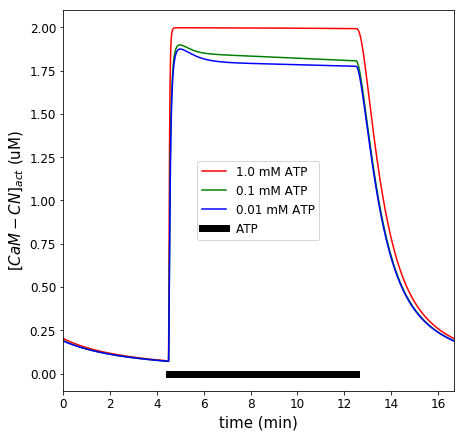

In [65]:
from numpy import ma
iters1 = np.arange(20)
interval = 1000
st = 480
ATP = []
timeATP = []
dummy = np.nan
for i in iters1:
    ti = i*interval
    tf = (1+i)*interval-st
    trs = scipy.linspace(ti,tf,(2))
    iters2 = np.arange(np.shape(trs)[0])
    for j in iters2:
        ATP = np.append(ATP,dummy)
    tst=scipy.linspace(tf,(tf+st),(2))
    iters3 = np.arange(np.shape(tst)[0])
    for k in iters3:
        ATP = np.append(ATP,0)
    timeATP = np.append(timeATP,trs)
    timeATP = np.append(timeATP,tst)

plt.figure(figsize=(7,7))
plt.tick_params(labelsize=12)
plt.plot((time1-18250)/60,CaMCN1*10**6,'r-',label="1.0 mM ATP")
plt.plot((time2-18250)/60,CaMCN2*10**6,'g-',label="0.1 mM ATP")
plt.plot((time3-18250)/60,CaMCN3*10**6,'b-',label="0.01 mM ATP")
plt.plot((timeATP-18250)/60,ATP,'k',label='ATP',linewidth=7)
plt.xlabel('time (min)',fontsize=15)
plt.ylabel('$[CaM-CN]_{act}$ (uM)',fontsize=15)
plt.legend(loc=0,fontsize=12)
#plt.tight_layout()
plt.xlim(0,1000/60)
#plt.ylim(-25,200)
plt.savefig('CaMCN8mins.png')

In [68]:
max1 = min(CaMCN1[188500:189700])
max2 = min(CaMCN2[188500:189700])
max3 = min(CaMCN3[188500:189700])

ratio = np.array([max3/max1,max2/max1,max1/max1])
print(ratio)

[ 0.8962031   0.91845462  1.        ]


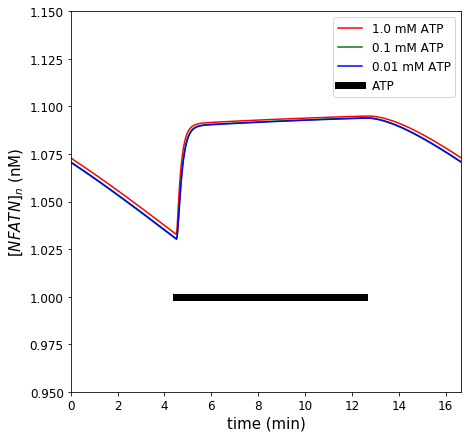

In [66]:
from numpy import ma
iters1 = np.arange(20)
interval = 1000
st = 480
ATP = []
timeATP = []
dummy = np.nan
for i in iters1:
    ti = i*interval
    tf = (1+i)*interval-st
    trs = scipy.linspace(ti,tf,(2))
    iters2 = np.arange(np.shape(trs)[0])
    for j in iters2:
        ATP = np.append(ATP,dummy)
    tst=scipy.linspace(tf,(tf+st),(2))
    iters3 = np.arange(np.shape(tst)[0])
    for k in iters3:
        ATP = np.append(ATP,1)
    timeATP = np.append(timeATP,trs)
    timeATP = np.append(timeATP,tst)

plt.figure(figsize=(7,7))
plt.tick_params(labelsize=12)
plt.plot((time1-18250)/60,NFATNn1,'r-',label="1.0 mM ATP")
plt.plot((time2-18250)/60,NFATNn2,'g-',label="0.1 mM ATP")
plt.plot((time3-18250)/60,NFATNn3,'b-',label="0.01 mM ATP")
plt.plot((timeATP-18250)/60,ATP,'k',label='ATP',linewidth=7)
plt.xlabel('time (min)',fontsize=15)
plt.ylabel('$[NFATN]_{n}$ (nM)',fontsize=15)
plt.legend(loc=0,fontsize=12)
#plt.tight_layout()
plt.xlim(0,1000/60)
plt.ylim(0.95,1.15)
plt.savefig('NFATN8mins.png')

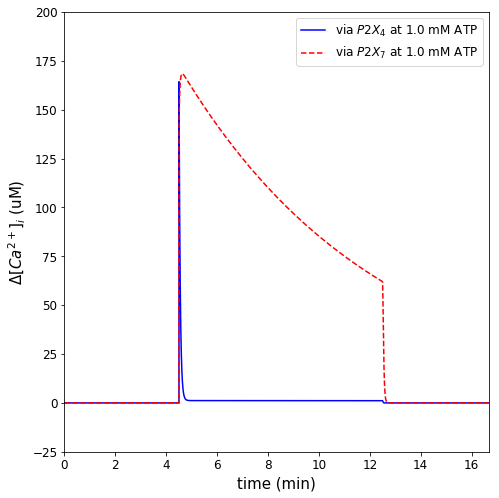

In [81]:
plt.figure(figsize=(7,7))
plt.plot((time1-18250)/60,Jp2x41*10**6,'b-',label="via $P2X_{4}$ at 1.0 mM ATP")
plt.plot((time1-18250)/60,Jp2x71*10**6,'r--',label="via $P2X_{7}$ at 1.0 mM ATP")
plt.plot((timeATP-18240)/60,ATP,'k',label='ATP',linewidth=7,label="ATP")
plt.tick_params(labelsize=12)
plt.xlabel('time (min)',fontsize=15)
plt.ylabel('$\Delta [Ca^{2+}]_{i}$ (uM)',fontsize=15)
plt.legend(loc=0,fontsize=12)
plt.tight_layout()
plt.xlim(0,1000/60)
plt.ylim(-25,200)
plt.savefig('P2X4vsP2X7_1mM.png')

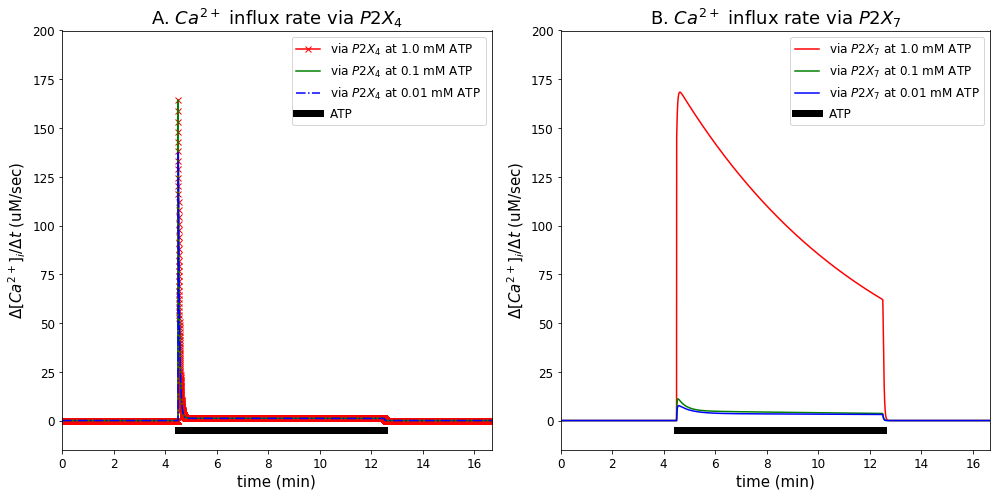

In [39]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("A. $Ca^{2+}$ influx rate via $P2X_{4}$",fontsize=18)
plt.plot((time1-18250)/60,Jp2x41*10**6,'r-x',label="via $P2X_{4}$ at 1.0 mM ATP")
plt.plot((time2-18250)/60,Jp2x42*10**6,'g-',label="via $P2X_{4}$ at 0.1 mM ATP")
plt.plot((time3-18250)/60,Jp2x43*10**6,'b-.',label="via $P2X_{4}$ at 0.01 mM ATP")
plt.plot((timeATP-18250)/60,ATP,'k',label='ATP',linewidth=7)
plt.tick_params(labelsize=12)
plt.xlabel('time (min)',fontsize=15)
plt.ylabel('$\Delta [Ca^{2+}]_{i}$/$\Delta t$ (uM/sec)',fontsize=15)
plt.legend(loc=0,fontsize=12)
plt.tight_layout()
plt.xlim(0,1000/60)
plt.ylim(-15,200)

plt.subplot(1,2,2)
plt.title("B. $Ca^{2+}$ influx rate via $P2X_{7}$",fontsize=18)
plt.plot((time1-18250)/60,Jp2x71*10**6,'r-',label="via $P2X_{7}$ at 1.0 mM ATP")
plt.plot((time2-18250)/60,Jp2x72*10**6,'g-',label="via $P2X_{7}$ at 0.1 mM ATP")
plt.plot((time3-18250)/60,Jp2x73*10**6,'b-',label="via $P2X_{7}$ at 0.01 mM ATP")
plt.plot((timeATP-18250)/60,ATP,'k',label='ATP',linewidth=7)
plt.tick_params(labelsize=12)
plt.xlabel('time (min)',fontsize=15)
plt.ylabel('$\Delta [Ca^{2+}]_{i}$/$\Delta t$ (uM/sec)',fontsize=15)
plt.legend(loc=0,fontsize=12)
plt.tight_layout()
plt.xlim(0,1000/60)
plt.ylim(-15,200)
plt.savefig('P2X4vsP2X7_all.png')